In [3]:
import sys
import os

# Add the 'back-end' directory to sys.path
sys.path.append(os.path.abspath(".."))

In [4]:
from ai.models.decisionTree import decisionTreeModel
from ai.models.logisticModel import logisticRegressionModel
from ai.models.randomforestmodel import randomForestModel
from ai.models.svm import svmModel
from ai.utils.aiUtils import X_test, y_test

import os

In [5]:
dtm = decisionTreeModel
rfm = randomForestModel
lr = logisticRegressionModel
svm = svmModel

In [6]:
y_pred_dtm = dtm.predict(X_test)
y_pred_rfm = rfm.predict(X_test)
y_pred_lr = lr.predict(X_test)
y_pred_svm = svm.predict(X_test)

In [7]:
from sklearn.metrics import accuracy_score

print('Accuracy Decision Tree Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_dtm)*100)
print('Accuracy Random Forest Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_rfm)*100)
print('Accuracy Logistic Regression Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_lr)*100)
print('Accuracy SVM Model: ', accuracy_score(y_true=y_test, y_pred=y_pred_svm)*100)

Accuracy Decision Tree Model:  93.7062937062937
Accuracy Random Forest Model:  95.8041958041958
Accuracy Logistic Regression Model:  97.2027972027972
Accuracy SVM Model:  95.8041958041958


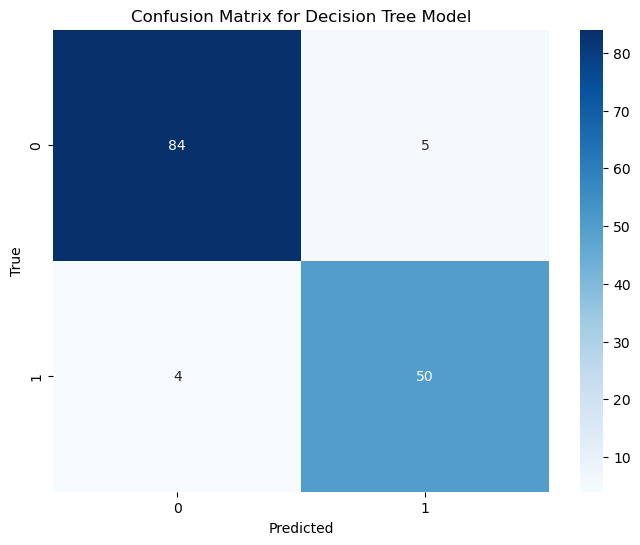

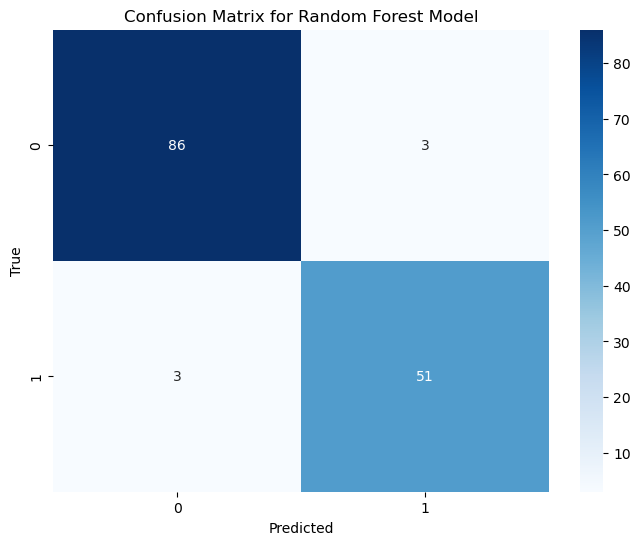

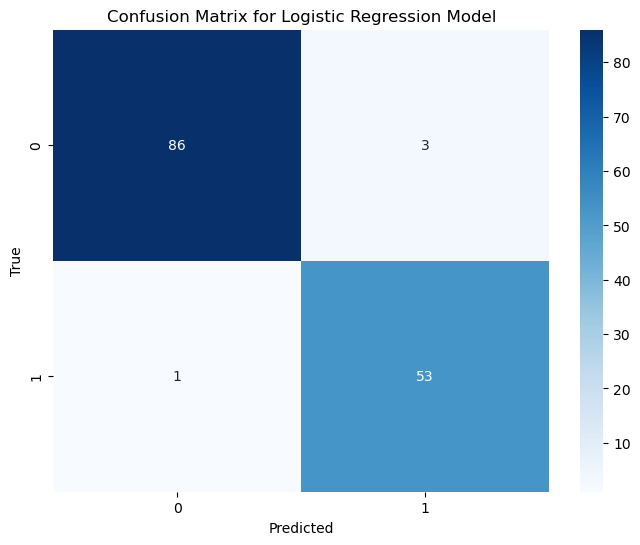

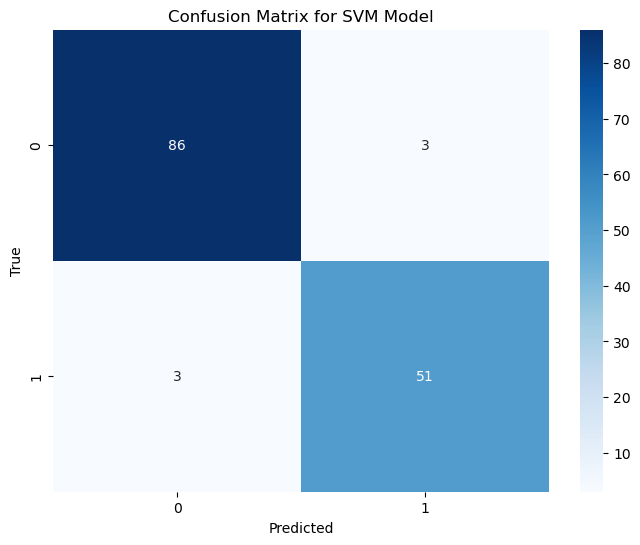

Classification Report for Decision Tree Model
              precision    recall  f1-score   support

           0       0.95      0.94      0.95        89
           1       0.91      0.93      0.92        54

    accuracy                           0.94       143
   macro avg       0.93      0.93      0.93       143
weighted avg       0.94      0.94      0.94       143

Classification Report for Random Forest Model
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        89
           1       0.94      0.94      0.94        54

    accuracy                           0.96       143
   macro avg       0.96      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143

Classification Report for Logistic Regression Model
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        89
           1       0.95      0.98      0.96        54

    accuracy                          

In [22]:
# Generate the Confusion Matrices
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    cm_df = pd.DataFrame(cm, index=np.unique(y_true), columns=np.unique(y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
plot_confusion_matrix(y_test, y_pred_dtm, "Decision Tree Model")
plot_confusion_matrix(y_test, y_pred_rfm, "Random Forest Model")
plot_confusion_matrix(y_test, y_pred_lr, "Logistic Regression Model")
plot_confusion_matrix(y_test, y_pred_svm, "SVM Model")
# Print a classification report
from sklearn.metrics import classification_report
print("Classification Report for Decision Tree Model")
print(classification_report(y_test, y_pred_dtm))
print("Classification Report for Random Forest Model")
print(classification_report(y_test, y_pred_rfm))
print("Classification Report for Logistic Regression Model")
print(classification_report(y_test, y_pred_lr))
print("Classification Report for SVM Model")
print(classification_report(y_test, y_pred_svm))




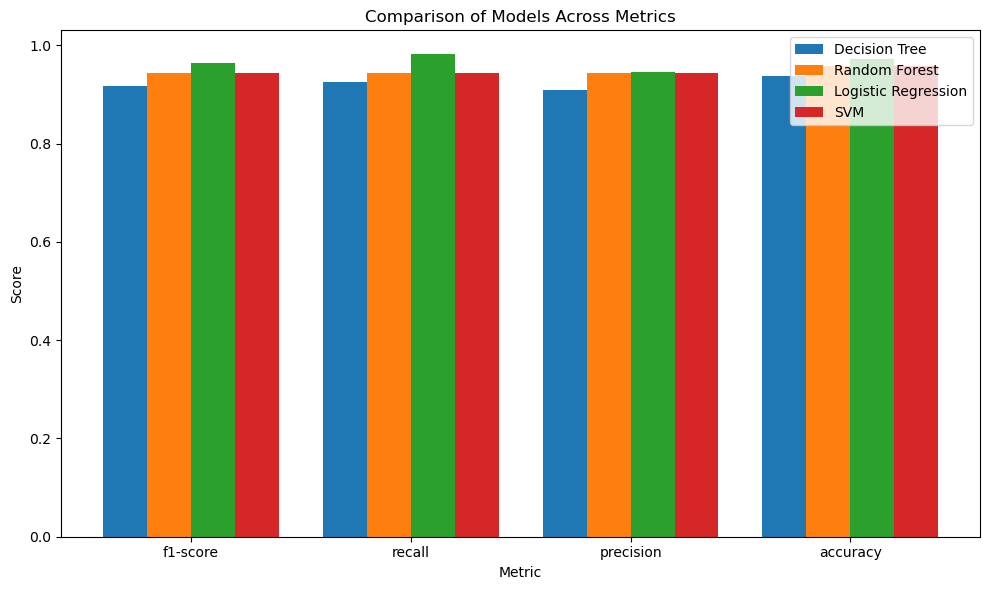

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score

# 1. Define your models and their predictions
models = ['Decision Tree', 'Random Forest', 'Logistic Regression', 'SVM']
y_preds = [y_pred_dtm, y_pred_rfm, y_pred_lr, y_pred_svm]

# 2. Define your metrics in the order you want them on the x-axis
metrics = ['f1-score', 'recall', 'precision', 'accuracy']

# 3. Compute a (4 models × 4 metrics) array of scores
scores = np.array([
    [
        f1_score(y_test, pred)         if metric == 'f1-score' else
        recall_score(y_test, pred)     if metric == 'recall'    else
        precision_score(y_test, pred)  if metric == 'precision' else
        accuracy_score(y_test, pred)
        for metric in metrics
    ]
    for pred in y_preds
])

# transpose so shape becomes (4 metrics × 4 models)
scores = scores.T

# 4. Set up the bar positions
x = np.arange(len(metrics))
width = 0.2

fig, ax = plt.subplots(figsize=(10, 6))

# 5. Plot one bar per model, offset horizontally
for i, model in enumerate(models):
    ax.bar(x + (i - 1.5) * width, scores[:, i], width, label=model)

# 6. Labels, ticks, legend
ax.set_xlabel('Metric')
ax.set_ylabel('Score')
ax.set_title('Comparison of Models Across Metrics')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

plt.tight_layout()
plt.show()